### Importing libraries.


In [ ]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
from keras import backend as K


### Reading Dataset
The dataset is read and analysed for missing values.

The min and max values are observed to identify the scaling factor and normalise the data.


In [ ]:
df = pd.read_csv("IOT_Assignment_2_data_regression_sensor_range.csv")
df.isna().sum()

Humidity(%)        0
Temperature(°C)    0
WaterFlow(%)       0
dtype: int64

In [ ]:
df.describe()

,Humidity(%),Temperature(°C),WaterFlow(%)
count,200.000000,200.000000,200.000000
mean,31.137437,59.747347,25.496364
std,12.386344,23.112767,34.953661
min,8.132132,20.000000,0.000000
25%,21.015015,40.860861,0.000000
50%,30.616617,58.638639,0.000000
75%,41.528529,78.998999,61.884829
max,51.867868,100.000000,100.000000


In [ ]:
df['Humidity(%)'] = df['Humidity(%)']/52
df['Temperature(°C)'] = df['Temperature(°C)']/100
df['WaterFlow(%)'] = df['WaterFlow(%)']/100

### Creating the dataset.
The dataset is sampled randomly and the test and training dataset are separated.

In [ ]:
df = df.sample(frac = 1)  #Randomizing

In [ ]:

X_train = df.iloc[:180,:-1]
y_train = df.iloc[:180,-1]
X_test = df.iloc[180:,:-1]
y_test = df.iloc[180:,-1]

### Creating the ML model.

In [ ]:
model = Sequential()
model.add(Dense(8, input_dim=2,  activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='relu'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 8)                 24        
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 36        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 5         
Total params: 65
Trainable params: 65
Non-trainable params: 0
_________________________________________________________________


### Training the model.
The model is trained using the adam optimizer for 40 epochs using batch size of 40.

In [ ]:
model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])
history = model.fit(X_train, y_train, epochs=40, batch_size=30,  verbose=1, validation_split=(10/180))

Epoch 1/40
6/6 [==============================] - 1s 31ms/step - loss: 0.0607 - mse: 0.0607 - mae: 0.2141 - val_loss: 0.0790 - val_mse: 0.0790 - val_mae: 0.2529
Epoch 2/40
6/6 [==============================] - 0s 6ms/step - loss: 0.0596 - mse: 0.0596 - mae: 0.2122 - val_loss: 0.0776 - val_mse: 0.0776 - val_mae: 0.2514
Epoch 3/40
6/6 [==============================] - 0s 6ms/step - loss: 0.0588 - mse: 0.0588 - mae: 0.2112 - val_loss: 0.0765 - val_mse: 0.0765 - val_mae: 0.2496
Epoch 4/40
6/6 [==============================] - 0s 6ms/step - loss: 0.0581 - mse: 0.0581 - mae: 0.2100 - val_loss: 0.0752 - val_mse: 0.0752 - val_mae: 0.2478
Epoch 5/40
6/6 [==============================] - 0s 6ms/step - loss: 0.0575 - mse: 0.0575 - mae: 0.2080 - val_loss: 0.0747 - val_mse: 0.0747 - val_mae: 0.2452
Epoch 6/40
6/6 [==============================] - 0s 5ms/step - loss: 0.0566 - mse: 0.0566 - mae: 0.2052 - val_loss: 0.0738 - val_mse: 0.0738 - val_mae: 0.2430
Epoch 7/40
6/6 [=======================

### Loss over epochs.

The change in the MSE(Mean Square Error) over iterations is plotted below.

We compare the train and validation losses to identify when the model starts to overfit the training dataset.

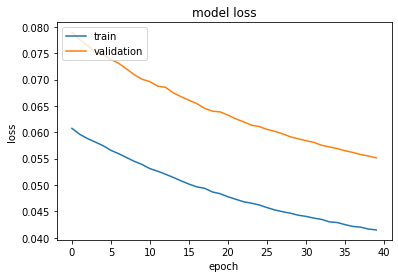

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

### R2 error of the model.

We compute the R2 error which tells how better is our model wrt the prediction value of average of the test set.

Our model performs way better than the average prediction.

In [ ]:
#Calculating R^2 score on testing set
y_predict = model.predict(X_test)
y_predict = y_predict.reshape(y_predict.shape[0])
SS_res =  np.sum((y_predict - y_test)**2)
SS_tot = np.sum(( y_test - np.mean(y_test) )**2 )
r2_score = ( 1 - SS_res/(SS_tot + K.epsilon()) )
print('-'*100)
print("R2 Score for our model on the training data is " + str(r2_score))

----------------------------------------------------------------------------------------------------
R2 Score for our model on the training data is 0.8188671474810473


### Displaying the weights

We print the weights that the model obtains in the end so that we can use it for the simulator weights value.

In [ ]:
print('*'*100)
print("The weight and Bias of the optimized model which we are going to implement the forward pass in the Wokwi Simulator is as following: ")
i=1
for layer in model.layers:
  retrieved_weights = np.array(layer.get_weights())
  print('_'*100)
  print("Weights and biases for the " + str(i) + " layer is as following:")
  print("Weights : ")
  print("Weights shape " + str(retrieved_weights[0].shape))
  print('{ ', end = " ")
  for i in range(retrieved_weights[0].shape[0]):
    print('{',end=" "),
    for j in range(retrieved_weights[0].shape[1]):
      print(retrieved_weights[0][i][j], end =" "),print(',', end =" "),
    print('}',end = " ")
  print('}', end = " ")
  print('Biases shape : ' + str(retrieved_weights[1].shape))
  print("Biases : ")
  print('{', end = " ")
  #print(retrieved_weights[0])
  for j in range(retrieved_weights[1].shape[0]):
      print(retrieved_weights[1][j], end =" "),print(',', end =" "),
  print('}', end = " ")
  i = i+1


****************************************************************************************************
The weight and Bias of the optimized model which we are going to implement the forward pass in the Wokwi Simulator is as following: 
____________________________________________________________________________________________________
Weights and biases for the 1 layer is as following:
Weights : 
Weights shape (2, 8)
{  { 0.42497733 , -0.34015045 , 0.009094426 , -0.2320921 , -0.20115054 , -0.27631652 , -0.74044544 , 0.41676497 , } { 0.5512921 , 0.66557246 , 0.23903899 , 0.82014924 , 0.4093639 , -0.7340672 , -0.7047632 , 0.6711298 , } } Biases shape : (8,)
Biases : 
{ 0.2142386 , -0.025956562 , 0.09237999 , -0.18130879 , 0.0070962617 , 0.0 , 0.0 , 0.16688068 , } ____________________________________________________________________________________________________
Weights and biases for the 2 layer is as following:
Weights : 
Weights shape (8, 4)
{  { 0.15006776 , -0.4868372 , 0.8360085 , 0.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """


### Hyper Parameter Tuning.

We try to find the best model parameter values for the following 3 fields.
- Number of neurons in the first hidden layer.
- Number of neurons in the second hidden layer.
- The optimizer choice of 'adam' and 'sgd'.

The optimal parameter found is used above and trained for the model.

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 4)                 12        
_________________________________________________________________
dense_7 (Dense)              (None, 2)                 10        
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 3         
Total params: 25
Trainable params: 25
Non-trainable params: 0
_________________________________________________________________
Epoch 1/40
6/6 [==============================] - 1s 32ms/step - loss: 0.3200 - mse: 0.3200 - mae: 0.4947 - val_loss: 0.2967 - val_mse: 0.2967 - val_mae: 0.4700
Epoch 2/40
6/6 [==============================] - 0s 6ms/step - loss: 0.2682 - mse: 0.2682 - mae: 0.4586 - val_loss: 0.2511 - val_mse: 0.2511 - val_mae: 0.4241
Epoch 3/40
6/6 [==============================] - 0s 7ms/step - los

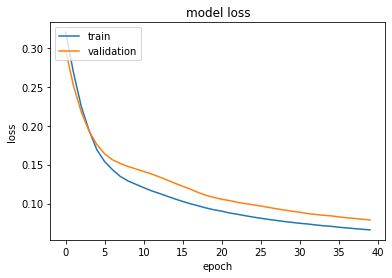

[[0.02052279 0.18378046 0.45806342 0.04808357 0.36509532 0.23261862
  0.12847807 0.16015719 0.47602355 0.00348635 0.48636329 0.48401269
  0.32872319 0.32290202 0.03243412 0.06700806 0.47210309 0.22883289
  0.0713812  0.45573965]
 [0.         0.         0.78755663 0.         0.73683097 0.
  0.         0.32261918 0.92785435 0.         0.97562423 0.91663287
  0.         0.         0.         0.         0.80323943 0.50670417
  0.         0.99155704]]
1/1 [==============================] - 0s 16ms/step - loss: 0.0854 - mse: 0.0854 - mae: 0.2411
[0.0853949636220932, 0.0853949636220932, 0.2410823106765747]
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 4)                 12        
_________________________________________________________________
dense_10 (Dense)             (None, 2)                 10        
_________________________________________

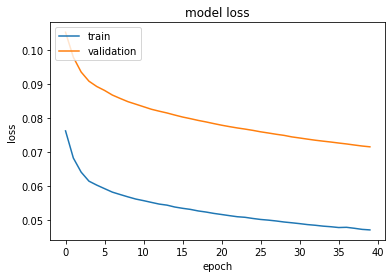

[[0.11766588 0.10175002 0.44692507 0.22827265 0.54308808 0.01836817
  0.28950915 0.21194969 0.67154974 0.07729031 0.72654879 0.63966072
  0.28647587 0.12605934 0.09301821 0.01490286 0.4481903  0.40253839
  0.03759253 0.71077001]
 [0.         0.         0.78755663 0.         0.73683097 0.
  0.         0.32261918 0.92785435 0.         0.97562423 0.91663287
  0.         0.         0.         0.         0.80323943 0.50670417
  0.         0.99155704]]
1/1 [==============================] - 0s 16ms/step - loss: 0.0430 - mse: 0.0430 - mae: 0.1779
[0.04303451627492905, 0.04303451627492905, 0.17791517078876495]
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 4)                 12        
_________________________________________________________________
dense_13 (Dense)             (None, 4)                 20        
______________________________________

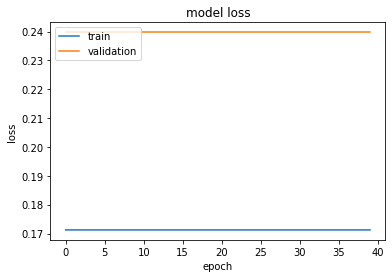

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.        ]
 [0.         0.         0.78755663 0.         0.73683097 0.
  0.         0.32261918 0.92785435 0.         0.97562423 0.91663287
  0.         0.         0.         0.         0.80323943 0.50670417
  0.         0.99155704]]
1/1 [==============================] - 0s 16ms/step - loss: 0.2903 - mse: 0.2903 - mae: 0.3484
[0.2902674078941345, 0.2902674078941345, 0.34843093156814575]
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 4)                 12        
_________________________________________________________________
dense_16 (Dense)             (None, 4)                 20        
________________________________________________________________

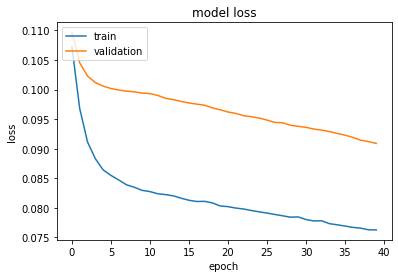

[[0.13926411 0.21498954 0.44765291 0.05146999 0.33348572 0.28057575
  0.12609434 0.17247385 0.43203351 0.09849652 0.44159886 0.44286761
  0.33770868 0.35725409 0.05739047 0.11640736 0.46225896 0.21313894
  0.13670149 0.40372011]
 [0.         0.         0.78755663 0.         0.73683097 0.
  0.         0.32261918 0.92785435 0.         0.97562423 0.91663287
  0.         0.         0.         0.         0.80323943 0.50670417
  0.         0.99155704]]
1/1 [==============================] - 0s 17ms/step - loss: 0.1027 - mse: 0.1027 - mae: 0.2768
[0.10270192474126816, 0.10270192474126816, 0.27678704261779785]
Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 4)                 12        
_________________________________________________________________
dense_19 (Dense)             (None, 6)                 30        
______________________________________

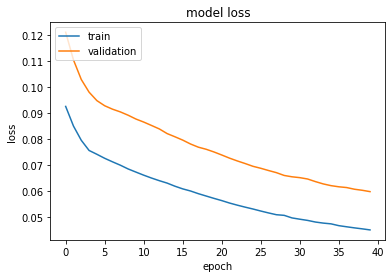

[[0.         0.11231808 0.50398004 0.11979027 0.51519197 0.07981479
  0.20751479 0.17347412 0.66674638 0.         0.70315546 0.6489951
  0.32094061 0.20875487 0.01942576 0.         0.51293832 0.3417055
  0.         0.72003645]
 [0.         0.         0.78755663 0.         0.73683097 0.
  0.         0.32261918 0.92785435 0.         0.97562423 0.91663287
  0.         0.         0.         0.         0.80323943 0.50670417
  0.         0.99155704]]
1/1 [==============================] - 0s 15ms/step - loss: 0.0387 - mse: 0.0387 - mae: 0.1625
[0.03872048854827881, 0.03872048854827881, 0.1625477373600006]
Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 4)                 12        
_________________________________________________________________
dense_22 (Dense)             (None, 6)                 30        
_________________________________________

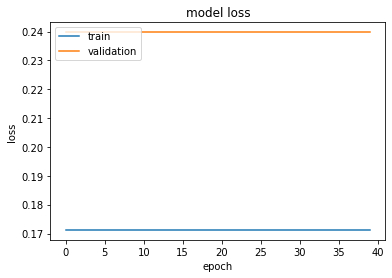

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.        ]
 [0.         0.         0.78755663 0.         0.73683097 0.
  0.         0.32261918 0.92785435 0.         0.97562423 0.91663287
  0.         0.         0.         0.         0.80323943 0.50670417
  0.         0.99155704]]
1/1 [==============================] - 0s 17ms/step - loss: 0.2903 - mse: 0.2903 - mae: 0.3484
[0.2902674078941345, 0.2902674078941345, 0.34843093156814575]
Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 4)                 12        
_________________________________________________________________
dense_25 (Dense)             (None, 8)                 40        
________________________________________________________________

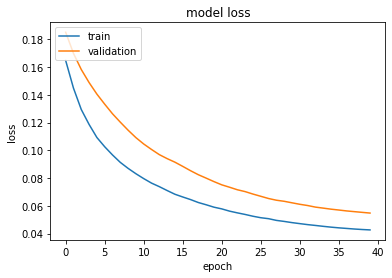

[[0.05545672 0.10345567 0.53011334 0.09140099 0.54651022 0.10965279
  0.19202769 0.15082705 0.72210079 0.         0.77730501 0.70011973
  0.31884503 0.23305398 0.         0.         0.54018956 0.34672946
  0.         0.81737959]
 [0.         0.         0.78755663 0.         0.73683097 0.
  0.         0.32261918 0.92785435 0.         0.97562423 0.91663287
  0.         0.         0.         0.         0.80323943 0.50670417
  0.         0.99155704]]
1/1 [==============================] - 0s 17ms/step - loss: 0.0306 - mse: 0.0306 - mae: 0.1471
[0.030634339898824692, 0.030634339898824692, 0.14706185460090637]
Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_27 (Dense)             (None, 4)                 12        
_________________________________________________________________
dense_28 (Dense)             (None, 8)                 40        
____________________________________

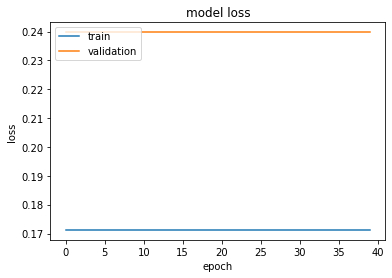

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.        ]
 [0.         0.         0.78755663 0.         0.73683097 0.
  0.         0.32261918 0.92785435 0.         0.97562423 0.91663287
  0.         0.         0.         0.         0.80323943 0.50670417
  0.         0.99155704]]
1/1 [==============================] - 0s 16ms/step - loss: 0.2903 - mse: 0.2903 - mae: 0.3484
[0.2902674078941345, 0.2902674078941345, 0.34843093156814575]
Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 6)                 18        
_________________________________________________________________
dense_31 (Dense)             (None, 2)                 14        
_______________________________________________________________

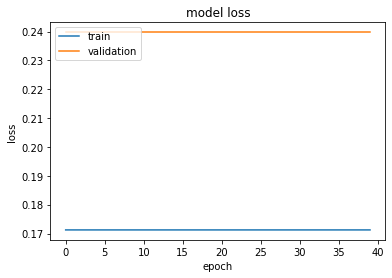

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.        ]
 [0.         0.         0.78755663 0.         0.73683097 0.
  0.         0.32261918 0.92785435 0.         0.97562423 0.91663287
  0.         0.         0.         0.         0.80323943 0.50670417
  0.         0.99155704]]
1/1 [==============================] - 0s 18ms/step - loss: 0.2903 - mse: 0.2903 - mae: 0.3484
[0.2902674078941345, 0.2902674078941345, 0.34843093156814575]
Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_33 (Dense)             (None, 6)                 18        
_________________________________________________________________
dense_34 (Dense)             (None, 2)                 14        
_______________________________________________________________

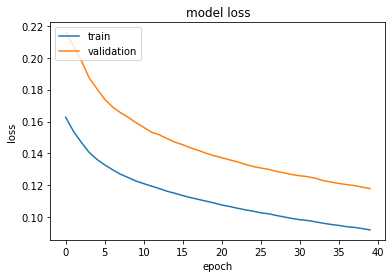

[[0.22327477 0.2209934  0.33362523 0.16062769 0.29187715 0.25932288
  0.19423413 0.20923403 0.3386806  0.19484311 0.34538892 0.34148329
  0.28053698 0.28035483 0.15616004 0.18540299 0.33965707 0.23555204
  0.20339617 0.29491639]
 [0.         0.         0.78755663 0.         0.73683097 0.
  0.         0.32261918 0.92785435 0.         0.97562423 0.91663287
  0.         0.         0.         0.         0.80323943 0.50670417
  0.         0.99155704]]
1/1 [==============================] - 0s 18ms/step - loss: 0.1395 - mse: 0.1395 - mae: 0.3299
[0.13953068852424622, 0.13953068852424622, 0.32986754179000854]
Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_36 (Dense)             (None, 6)                 18        
_________________________________________________________________
dense_37 (Dense)             (None, 4)                 28        
_____________________________________

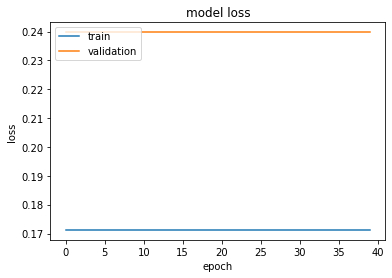

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.        ]
 [0.         0.         0.78755663 0.         0.73683097 0.
  0.         0.32261918 0.92785435 0.         0.97562423 0.91663287
  0.         0.         0.         0.         0.80323943 0.50670417
  0.         0.99155704]]
1/1 [==============================] - 0s 18ms/step - loss: 0.2903 - mse: 0.2903 - mae: 0.3484
[0.2902674078941345, 0.2902674078941345, 0.34843093156814575]
Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_39 (Dense)             (None, 6)                 18        
_________________________________________________________________
dense_40 (Dense)             (None, 4)                 28        
_______________________________________________________________

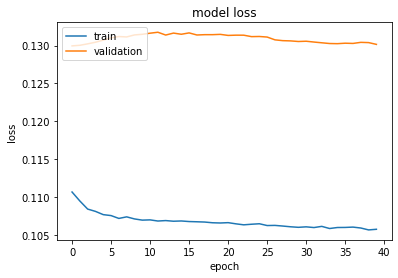

[[0.25932249 0.24500608 0.34994602 0.07505696 0.22925007 0.32321
  0.12160896 0.18067265 0.27832255 0.21452904 0.27200192 0.2957086
  0.29966328 0.35784212 0.11526509 0.20167704 0.36185136 0.16506736
  0.23014295 0.21997708]
 [0.         0.         0.78755663 0.         0.73683097 0.
  0.         0.32261918 0.92785435 0.         0.97562423 0.91663287
  0.         0.         0.         0.         0.80323943 0.50670417
  0.         0.99155704]]
1/1 [==============================] - 0s 18ms/step - loss: 0.1651 - mse: 0.1651 - mae: 0.3530
[0.1650824248790741, 0.1650824248790741, 0.35295727849006653]
Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_42 (Dense)             (None, 6)                 18        
_________________________________________________________________
dense_43 (Dense)             (None, 6)                 42        
___________________________________________

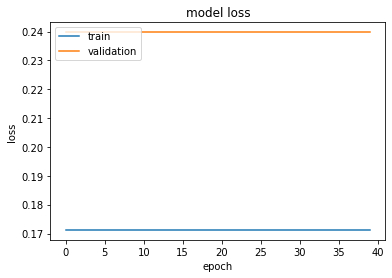

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.        ]
 [0.         0.         0.78755663 0.         0.73683097 0.
  0.         0.32261918 0.92785435 0.         0.97562423 0.91663287
  0.         0.         0.         0.         0.80323943 0.50670417
  0.         0.99155704]]
1/1 [==============================] - 0s 22ms/step - loss: 0.2903 - mse: 0.2903 - mae: 0.3484
[0.2902674078941345, 0.2902674078941345, 0.34843093156814575]
Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_45 (Dense)             (None, 6)                 18        
_________________________________________________________________
dense_46 (Dense)             (None, 6)                 42        
_______________________________________________________________

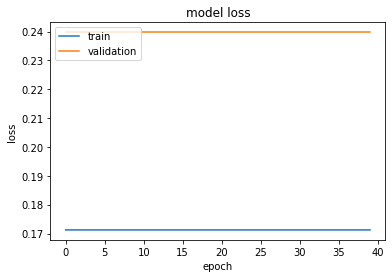

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.        ]
 [0.         0.         0.78755663 0.         0.73683097 0.
  0.         0.32261918 0.92785435 0.         0.97562423 0.91663287
  0.         0.         0.         0.         0.80323943 0.50670417
  0.         0.99155704]]
1/1 [==============================] - 0s 16ms/step - loss: 0.2903 - mse: 0.2903 - mae: 0.3484
[0.2902674078941345, 0.2902674078941345, 0.34843093156814575]
Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_48 (Dense)             (None, 6)                 18        
_________________________________________________________________
dense_49 (Dense)             (None, 8)                 56        
_______________________________________________________________

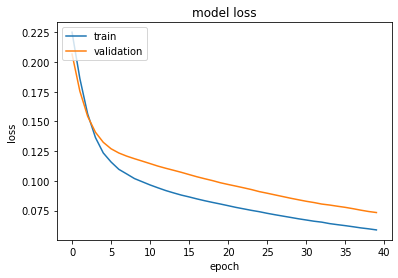

[[0.06463842 0.16622564 0.47019759 0.08919574 0.41931292 0.1828655
  0.1683815  0.17480674 0.5414983  0.03824984 0.54665405 0.53790259
  0.32754192 0.28297764 0.04362376 0.05716203 0.481729   0.27614269
  0.06859274 0.48280904]
 [0.         0.         0.78755663 0.         0.73683097 0.
  0.         0.32261918 0.92785435 0.         0.97562423 0.91663287
  0.         0.         0.         0.         0.80323943 0.50670417
  0.         0.99155704]]
1/1 [==============================] - 0s 16ms/step - loss: 0.0708 - mse: 0.0708 - mae: 0.2264
[0.07078568637371063, 0.07078568637371063, 0.22635102272033691]
Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_51 (Dense)             (None, 6)                 18        
_________________________________________________________________
dense_52 (Dense)             (None, 8)                 56        
______________________________________

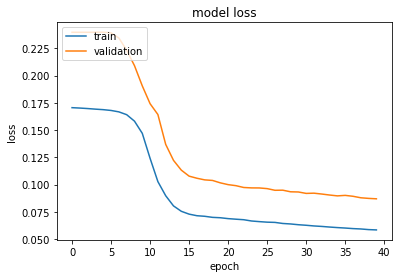

[[0.         0.12900826 0.3711094  0.32620928 0.53098011 0.00190416
  0.36938027 0.26661077 0.61490625 0.         0.66768539 0.57584596
  0.25949904 0.08105789 0.20122476 0.02232395 0.36489502 0.44534501
  0.         0.64380801]
 [0.         0.         0.78755663 0.         0.73683097 0.
  0.         0.32261918 0.92785435 0.         0.97562423 0.91663287
  0.         0.         0.         0.         0.80323943 0.50670417
  0.         0.99155704]]
1/1 [==============================] - 0s 16ms/step - loss: 0.0610 - mse: 0.0610 - mae: 0.1939
[0.06095397472381592, 0.06095397472381592, 0.19390204548835754]
Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_54 (Dense)             (None, 8)                 24        
_________________________________________________________________
dense_55 (Dense)             (None, 2)                 18        
_____________________________________

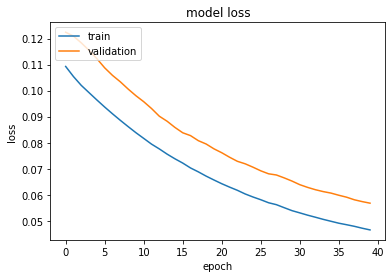

[[0.         0.12947398 0.54379827 0.06087434 0.50062251 0.1363394
  0.16392902 0.15825513 0.66541606 0.         0.70705897 0.65578586
  0.34961605 0.27019742 0.         0.         0.55750388 0.30922288
  0.         0.72045529]
 [0.         0.         0.78755663 0.         0.73683097 0.
  0.         0.32261918 0.92785435 0.         0.97562423 0.91663287
  0.         0.         0.         0.         0.80323943 0.50670417
  0.         0.99155704]]
1/1 [==============================] - 0s 18ms/step - loss: 0.0393 - mse: 0.0393 - mae: 0.1630
[0.039265990257263184, 0.039265990257263184, 0.16304650902748108]
Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_57 (Dense)             (None, 8)                 24        
_________________________________________________________________
dense_58 (Dense)             (None, 2)                 18        
____________________________________

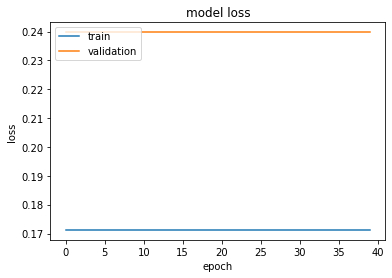

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.        ]
 [0.         0.         0.78755663 0.         0.73683097 0.
  0.         0.32261918 0.92785435 0.         0.97562423 0.91663287
  0.         0.         0.         0.         0.80323943 0.50670417
  0.         0.99155704]]
1/1 [==============================] - 0s 18ms/step - loss: 0.2903 - mse: 0.2903 - mae: 0.3484
[0.2902674078941345, 0.2902674078941345, 0.34843093156814575]
Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_60 (Dense)             (None, 8)                 24        
_________________________________________________________________
dense_61 (Dense)             (None, 4)                 36        
_______________________________________________________________

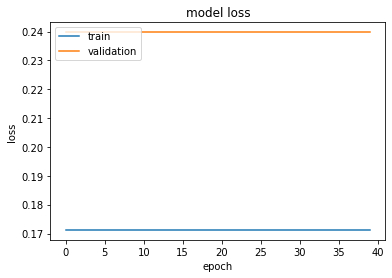

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.        ]
 [0.         0.         0.78755663 0.         0.73683097 0.
  0.         0.32261918 0.92785435 0.         0.97562423 0.91663287
  0.         0.         0.         0.         0.80323943 0.50670417
  0.         0.99155704]]
1/1 [==============================] - 0s 19ms/step - loss: 0.2903 - mse: 0.2903 - mae: 0.3484
[0.2902674078941345, 0.2902674078941345, 0.34843093156814575]
Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_63 (Dense)             (None, 8)                 24        
_________________________________________________________________
dense_64 (Dense)             (None, 4)                 36        
_______________________________________________________________

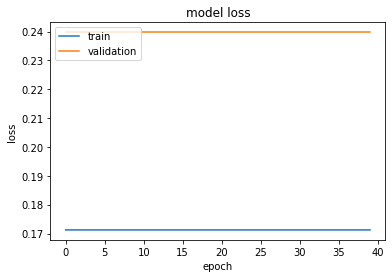

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.        ]
 [0.         0.         0.78755663 0.         0.73683097 0.
  0.         0.32261918 0.92785435 0.         0.97562423 0.91663287
  0.         0.         0.         0.         0.80323943 0.50670417
  0.         0.99155704]]
1/1 [==============================] - 0s 16ms/step - loss: 0.2903 - mse: 0.2903 - mae: 0.3484
[0.2902674078941345, 0.2902674078941345, 0.34843093156814575]
Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_66 (Dense)             (None, 8)                 24        
_________________________________________________________________
dense_67 (Dense)             (None, 6)                 54        
_______________________________________________________________

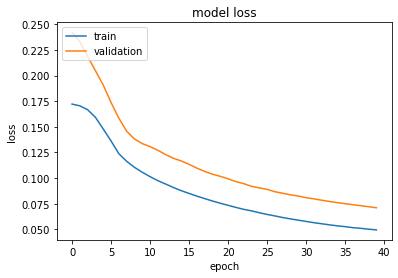

[[0.         0.1264471  0.46509975 0.21650515 0.53493327 0.05608873
  0.28115165 0.21856914 0.645365   0.         0.62577909 0.63574636
  0.30743665 0.16753642 0.09710284 0.         0.46822464 0.39353216
  0.         0.50935096]
 [0.         0.         0.78755663 0.         0.73683097 0.
  0.         0.32261918 0.92785435 0.         0.97562423 0.91663287
  0.         0.         0.         0.         0.80323943 0.50670417
  0.         0.99155704]]
1/1 [==============================] - 0s 16ms/step - loss: 0.0536 - mse: 0.0536 - mae: 0.1862
[0.05356461927294731, 0.05356461927294731, 0.1862143576145172]
Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_69 (Dense)             (None, 8)                 24        
_________________________________________________________________
dense_70 (Dense)             (None, 6)                 54        
______________________________________

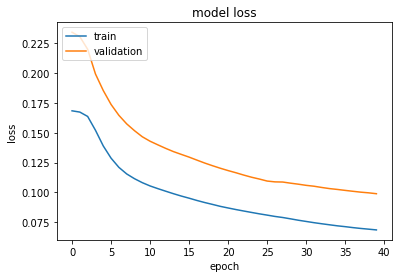

[[0.         0.13151769 0.35603321 0.23593345 0.37897313 0.07008493
  0.27313238 0.21268761 0.39399675 0.02716014 0.39790577 0.39108887
  0.25091898 0.13894734 0.13795052 0.06852496 0.35573688 0.33107746
  0.04858273 0.39832765]
 [0.         0.         0.78755663 0.         0.73683097 0.
  0.         0.32261918 0.92785435 0.         0.97562423 0.91663287
  0.         0.         0.         0.         0.80323943 0.50670417
  0.         0.99155704]]
1/1 [==============================] - 0s 16ms/step - loss: 0.1033 - mse: 0.1033 - mae: 0.2568
[0.10329542309045792, 0.10329542309045792, 0.25677722692489624]
Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_72 (Dense)             (None, 8)                 24        
_________________________________________________________________
dense_73 (Dense)             (None, 8)                 72        
_____________________________________

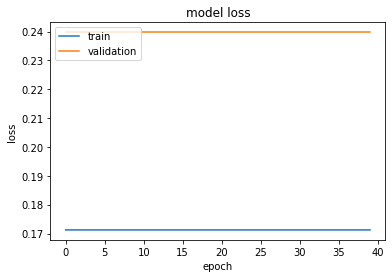

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.        ]
 [0.         0.         0.78755663 0.         0.73683097 0.
  0.         0.32261918 0.92785435 0.         0.97562423 0.91663287
  0.         0.         0.         0.         0.80323943 0.50670417
  0.         0.99155704]]
1/1 [==============================] - 0s 16ms/step - loss: 0.2903 - mse: 0.2903 - mae: 0.3484
[0.2902674078941345, 0.2902674078941345, 0.34843093156814575]
Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_75 (Dense)             (None, 8)                 24        
_________________________________________________________________
dense_76 (Dense)             (None, 8)                 72        
_______________________________________________________________

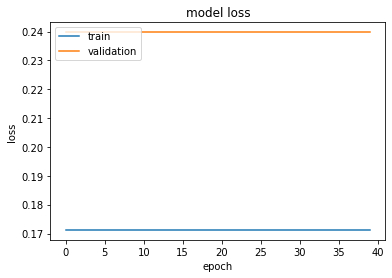

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.        ]
 [0.         0.         0.78755663 0.         0.73683097 0.
  0.         0.32261918 0.92785435 0.         0.97562423 0.91663287
  0.         0.         0.         0.         0.80323943 0.50670417
  0.         0.99155704]]
1/1 [==============================] - 0s 16ms/step - loss: 0.2903 - mse: 0.2903 - mae: 0.3484
[0.2902674078941345, 0.2902674078941345, 0.34843093156814575]
Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_78 (Dense)             (None, 16)                48        
_________________________________________________________________
dense_79 (Dense)             (None, 2)                 34        
_______________________________________________________________

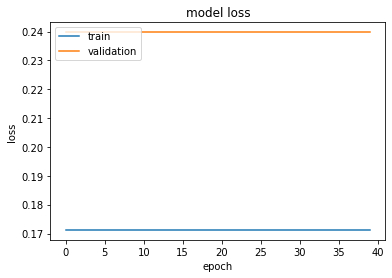

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.        ]
 [0.         0.         0.78755663 0.         0.73683097 0.
  0.         0.32261918 0.92785435 0.         0.97562423 0.91663287
  0.         0.         0.         0.         0.80323943 0.50670417
  0.         0.99155704]]
1/1 [==============================] - 0s 20ms/step - loss: 0.2903 - mse: 0.2903 - mae: 0.3484
[0.2902674078941345, 0.2902674078941345, 0.34843093156814575]
Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_81 (Dense)             (None, 16)                48        
_________________________________________________________________
dense_82 (Dense)             (None, 2)                 34        
_______________________________________________________________

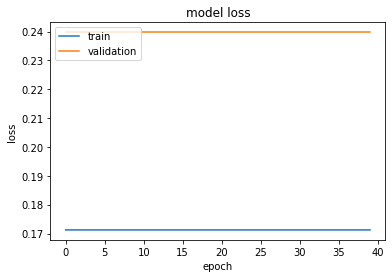

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.        ]
 [0.         0.         0.78755663 0.         0.73683097 0.
  0.         0.32261918 0.92785435 0.         0.97562423 0.91663287
  0.         0.         0.         0.         0.80323943 0.50670417
  0.         0.99155704]]
1/1 [==============================] - 0s 17ms/step - loss: 0.2903 - mse: 0.2903 - mae: 0.3484
[0.2902674078941345, 0.2902674078941345, 0.34843093156814575]
Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_84 (Dense)             (None, 16)                48        
_________________________________________________________________
dense_85 (Dense)             (None, 4)                 68        
_______________________________________________________________

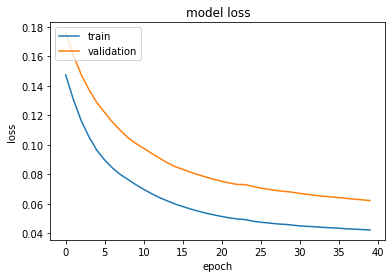

[[0.00801637 0.07921179 0.50266129 0.19205327 0.58849239 0.02558838
  0.27057019 0.19311142 0.7418552  0.         0.77026618 0.71504551
  0.30533269 0.14125971 0.0407932  0.         0.50669205 0.41130742
  0.         0.7724756 ]
 [0.         0.         0.78755663 0.         0.73683097 0.
  0.         0.32261918 0.92785435 0.         0.97562423 0.91663287
  0.         0.         0.         0.         0.80323943 0.50670417
  0.         0.99155704]]
1/1 [==============================] - 0s 17ms/step - loss: 0.0307 - mse: 0.0307 - mae: 0.1415
[0.030715862289071083, 0.030715862289071083, 0.14147688448429108]
Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_87 (Dense)             (None, 16)                48        
_________________________________________________________________
dense_88 (Dense)             (None, 4)                 68        
___________________________________

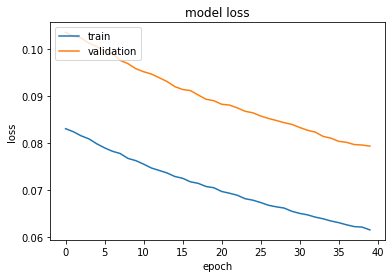

[[0.05355624 0.17716199 0.43180862 0.12146471 0.39803973 0.18987775
  0.18734901 0.18546359 0.49897823 0.04950416 0.5212661  0.49656221
  0.31074759 0.27276996 0.07692857 0.06915845 0.44073239 0.27956876
  0.0724209  0.51983994]
 [0.         0.         0.78755663 0.         0.73683097 0.
  0.         0.32261918 0.92785435 0.         0.97562423 0.91663287
  0.         0.         0.         0.         0.80323943 0.50670417
  0.         0.99155704]]
1/1 [==============================] - 0s 17ms/step - loss: 0.0771 - mse: 0.0771 - mae: 0.2389
[0.07710137218236923, 0.07710137218236923, 0.2388649433851242]
Model: "sequential_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_90 (Dense)             (None, 16)                48        
_________________________________________________________________
dense_91 (Dense)             (None, 6)                 102       
______________________________________

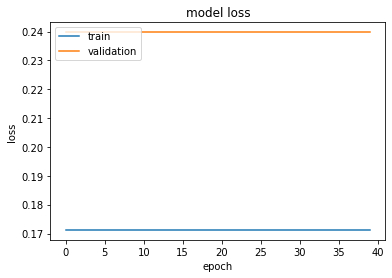

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.        ]
 [0.         0.         0.78755663 0.         0.73683097 0.
  0.         0.32261918 0.92785435 0.         0.97562423 0.91663287
  0.         0.         0.         0.         0.80323943 0.50670417
  0.         0.99155704]]
1/1 [==============================] - 0s 24ms/step - loss: 0.2903 - mse: 0.2903 - mae: 0.3484
[0.2902674078941345, 0.2902674078941345, 0.34843093156814575]
Model: "sequential_31"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_93 (Dense)             (None, 16)                48        
_________________________________________________________________
dense_94 (Dense)             (None, 6)                 102       
_______________________________________________________________

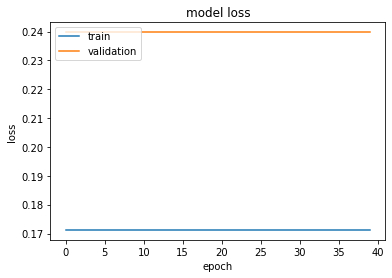

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.        ]
 [0.         0.         0.78755663 0.         0.73683097 0.
  0.         0.32261918 0.92785435 0.         0.97562423 0.91663287
  0.         0.         0.         0.         0.80323943 0.50670417
  0.         0.99155704]]
1/1 [==============================] - 0s 18ms/step - loss: 0.2903 - mse: 0.2903 - mae: 0.3484
[0.2902674078941345, 0.2902674078941345, 0.34843093156814575]
Model: "sequential_32"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_96 (Dense)             (None, 16)                48        
_________________________________________________________________
dense_97 (Dense)             (None, 8)                 136       
_______________________________________________________________

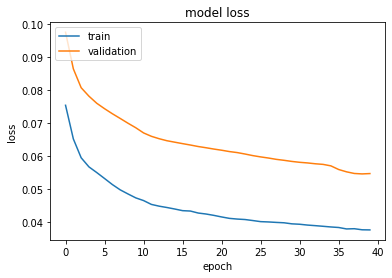

[[0.         0.01341215 0.55439258 0.11009211 0.65869987 0.
  0.23610306 0.14061713 0.84027028 0.         0.87641108 0.82044125
  0.31284797 0.10860547 0.         0.         0.55992901 0.4308522
  0.         0.85326731]
 [0.         0.         0.78755663 0.         0.73683097 0.
  0.         0.32261918 0.92785435 0.         0.97562423 0.91663287
  0.         0.         0.         0.         0.80323943 0.50670417
  0.         0.99155704]]
1/1 [==============================] - 0s 18ms/step - loss: 0.0191 - mse: 0.0191 - mae: 0.1007
[0.019107654690742493, 0.019107654690742493, 0.10073994100093842]
Model: "sequential_33"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_99 (Dense)             (None, 16)                48        
_________________________________________________________________
dense_100 (Dense)            (None, 8)                 136       
____________________________________________

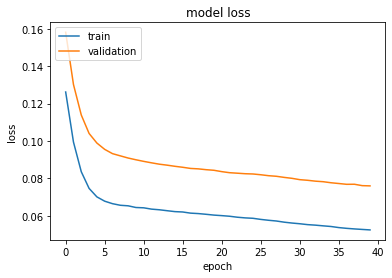

[[0.         0.13043766 0.43763047 0.24190922 0.49088079 0.04572248
  0.29420072 0.23463383 0.58474535 0.         0.61898535 0.56785363
  0.30316582 0.15191068 0.12378646 0.0091155  0.43961799 0.38590953
  0.         0.65033913]
 [0.         0.         0.78755663 0.         0.73683097 0.
  0.         0.32261918 0.92785435 0.         0.97562423 0.91663287
  0.         0.         0.         0.         0.80323943 0.50670417
  0.         0.99155704]]
1/1 [==============================] - 0s 17ms/step - loss: 0.0558 - mse: 0.0558 - mae: 0.1929
[0.05575280264019966, 0.05575280264019966, 0.19291356205940247]
Model: "sequential_34"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_102 (Dense)            (None, 32)                96        
_________________________________________________________________
dense_103 (Dense)            (None, 2)                 66        
_____________________________________

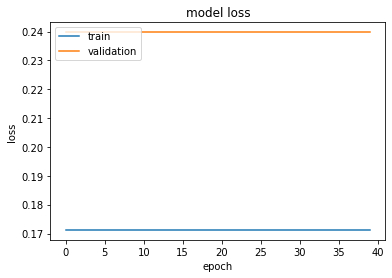

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.        ]
 [0.         0.         0.78755663 0.         0.73683097 0.
  0.         0.32261918 0.92785435 0.         0.97562423 0.91663287
  0.         0.         0.         0.         0.80323943 0.50670417
  0.         0.99155704]]
1/1 [==============================] - 0s 15ms/step - loss: 0.2903 - mse: 0.2903 - mae: 0.3484
[0.2902674078941345, 0.2902674078941345, 0.34843093156814575]
Model: "sequential_35"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_105 (Dense)            (None, 32)                96        
_________________________________________________________________
dense_106 (Dense)            (None, 2)                 66        
_______________________________________________________________

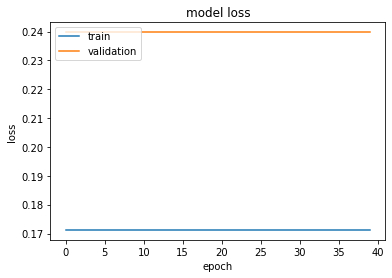

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.        ]
 [0.         0.         0.78755663 0.         0.73683097 0.
  0.         0.32261918 0.92785435 0.         0.97562423 0.91663287
  0.         0.         0.         0.         0.80323943 0.50670417
  0.         0.99155704]]
1/1 [==============================] - 0s 16ms/step - loss: 0.2903 - mse: 0.2903 - mae: 0.3484
[0.2902674078941345, 0.2902674078941345, 0.34843093156814575]
Model: "sequential_36"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_108 (Dense)            (None, 32)                96        
_________________________________________________________________
dense_109 (Dense)            (None, 4)                 132       
_______________________________________________________________

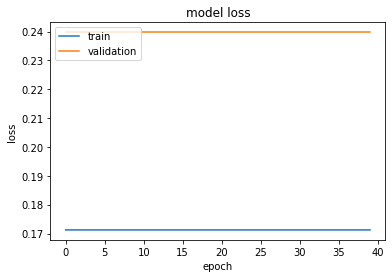

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.        ]
 [0.         0.         0.78755663 0.         0.73683097 0.
  0.         0.32261918 0.92785435 0.         0.97562423 0.91663287
  0.         0.         0.         0.         0.80323943 0.50670417
  0.         0.99155704]]
1/1 [==============================] - 0s 16ms/step - loss: 0.2903 - mse: 0.2903 - mae: 0.3484
[0.2902674078941345, 0.2902674078941345, 0.34843093156814575]
Model: "sequential_37"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_111 (Dense)            (None, 32)                96        
_________________________________________________________________
dense_112 (Dense)            (None, 4)                 132       
_______________________________________________________________

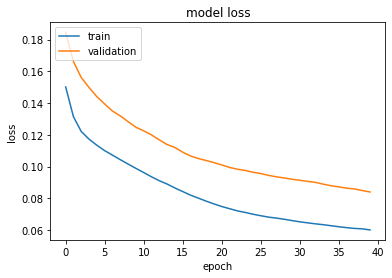

[[0.04621049 0.16269432 0.39829656 0.2216239  0.44717523 0.15447012
  0.26779255 0.21982622 0.52354217 0.0451286  0.53726518 0.51756793
  0.28511086 0.21369018 0.13092366 0.08442537 0.40071884 0.34943533
  0.08009574 0.53213078]
 [0.         0.         0.78755663 0.         0.73683097 0.
  0.         0.32261918 0.92785435 0.         0.97562423 0.91663287
  0.         0.         0.         0.         0.80323943 0.50670417
  0.         0.99155704]]
1/1 [==============================] - 0s 22ms/step - loss: 0.0746 - mse: 0.0746 - mae: 0.2367
[0.07458335161209106, 0.07458335161209106, 0.2367413341999054]
Model: "sequential_38"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_114 (Dense)            (None, 32)                96        
_________________________________________________________________
dense_115 (Dense)            (None, 6)                 198       
______________________________________

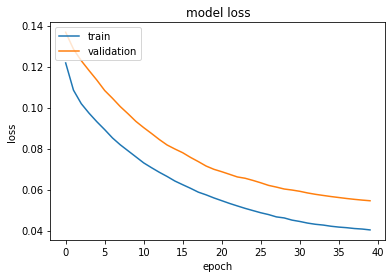

[[0.         0.06157155 0.53051507 0.11165635 0.57315743 0.02972365
  0.21117646 0.15410626 0.75287127 0.         0.80172515 0.7263732
  0.31165555 0.15622339 0.         0.         0.53896701 0.37004995
  0.         0.75854176]
 [0.         0.         0.78755663 0.         0.73683097 0.
  0.         0.32261918 0.92785435 0.         0.97562423 0.91663287
  0.         0.         0.         0.         0.80323943 0.50670417
  0.         0.99155704]]
1/1 [==============================] - 0s 17ms/step - loss: 0.0272 - mse: 0.0272 - mae: 0.1322
[0.02721986174583435, 0.02721986174583435, 0.1322159320116043]
Model: "sequential_39"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_117 (Dense)            (None, 32)                96        
_________________________________________________________________
dense_118 (Dense)            (None, 6)                 198       
_______________________________________

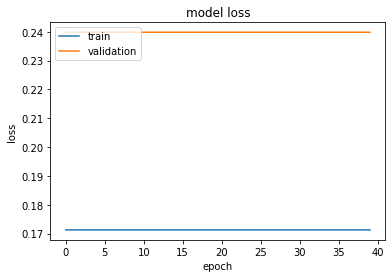

[[0.02431672 0.         0.         0.         0.         0.00128639
  0.         0.         0.         0.0160582  0.         0.
  0.         0.         0.         0.00244733 0.         0.
  0.00619937 0.        ]
 [0.         0.         0.78755663 0.         0.73683097 0.
  0.         0.32261918 0.92785435 0.         0.97562423 0.91663287
  0.         0.         0.         0.         0.80323943 0.50670417
  0.         0.99155704]]
1/1 [==============================] - 0s 17ms/step - loss: 0.2903 - mse: 0.2903 - mae: 0.3509
[0.2903122007846832, 0.2903122007846832, 0.3509463369846344]
Model: "sequential_40"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_120 (Dense)            (None, 32)                96        
_________________________________________________________________
dense_121 (Dense)            (None, 8)                 264       
________________________________________________________

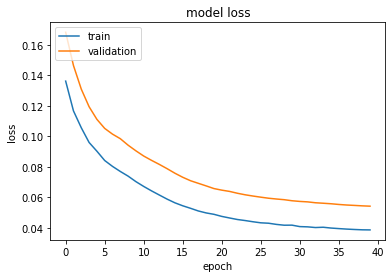

[[0.         0.03977255 0.55460852 0.1286051  0.62775677 0.
  0.23352584 0.15688869 0.82193106 0.         0.84258896 0.78993291
  0.31408426 0.12637135 0.         0.         0.56194955 0.40711159
  0.         0.77288759]
 [0.         0.         0.78755663 0.         0.73683097 0.
  0.         0.32261918 0.92785435 0.         0.97562423 0.91663287
  0.         0.         0.         0.         0.80323943 0.50670417
  0.         0.99155704]]
1/1 [==============================] - 0s 16ms/step - loss: 0.0221 - mse: 0.0221 - mae: 0.1138
[0.022091474384069443, 0.022091474384069443, 0.11376611143350601]
Model: "sequential_41"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_123 (Dense)            (None, 32)                96        
_________________________________________________________________
dense_124 (Dense)            (None, 8)                 264       
___________________________________________

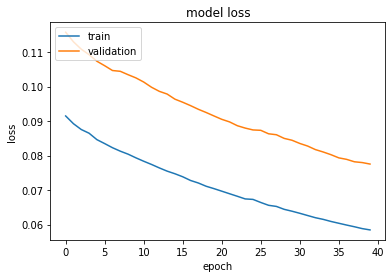

[[0.05972008 0.16790135 0.43781826 0.16226692 0.42874521 0.15951951
  0.22330591 0.20618293 0.52703726 0.03831926 0.55278373 0.52017701
  0.31259343 0.24079697 0.09660291 0.05539826 0.44461161 0.31309271
  0.05583742 0.54424572]
 [0.         0.         0.78755663 0.         0.73683097 0.
  0.         0.32261918 0.92785435 0.         0.97562423 0.91663287
  0.         0.         0.         0.         0.80323943 0.50670417
  0.         0.99155704]]
1/1 [==============================] - 0s 18ms/step - loss: 0.0700 - mse: 0.0700 - mae: 0.2283
[0.06998442858457565, 0.06998442858457565, 0.22830931842327118]


In [ ]:
l1= [4,6,8,16,32]
l2 = [2,4,6,8]
opt=['adam','sgd']
for l1s in l1:
  for l2s in l2:
    for opts in opt:
      model = Sequential()
      model.add(Dense(l1s, input_dim=2,  activation='relu'))
      model.add(Dense(l2s, activation='relu'))
      model.add(Dense(1, activation='relu'))
      model.summary()
      model.compile(loss='mse', optimizer=opts, metrics=['mse','mae'])
      history = model.fit(X_train, y_train, epochs=40, batch_size=30,  verbose=1, validation_split=(10/180))
      print("*"*50)
      print("l1 ",l1s, " and l2 ", l2s," and opts ",opts)
      print(history.history.keys())
      # "Loss"
      plt.plot(history.history['loss'])
      plt.plot(history.history['val_loss'])
      plt.title('model loss')
      plt.ylabel('loss')
      plt.xlabel('epoch')
      plt.legend(['train', 'validation'], loc='upper left')
      plt.show()
      predictions = model.predict(X_test)
      print(np.vstack([predictions.T,y_test]))
      score = model.evaluate(X_test, y_test,verbose=1)
      print(score)


### We obtain these optimal values:
- Number of neurons in the first hidden layer  =  8
- Number of neurons in the second hidden layer =  4
- The optimizer choice of 'adam' and 'sgd'     =  'adam'